<h1>Validación y Exploración de la Probabilidad a través de Simulaciones de Monte Carlo en Juegos de Azar</h1>

En el aprendizaje automático supervisado o no supervisado, tomamos un conjunto de datos, generalmente datos históricos. Ajustamos un modelo a los datos existentes y predecimos el valor futuro en base a eso, este tipo de modelización se llama modelización determinista. La modelización determinista nos proporciona los mismos resultados exactos para un conjunto particular de entradas, sin importar cuántas veces se recalcule el modelo. Aquí, las propiedades matemáticas son conocidas. Ninguna de ellas es aleatoria, y solo hay un conjunto de valores específicos y una sola respuesta o solución a un problema. Con un modelo determinista, los factores de incertidumbre son externos al modelo.

Cuando no tenemos datos pasados en los que basarnos, utilizamos variables aleatorias para diseñar el modelo y predecir los valores futuros. Este tipo de modelización se llama modelización estocástica, que pronostica la probabilidad de diversos resultados bajo diferentes condiciones, utilizando variables aleatorias. La Simulación de Monte Carlo es un ejemplo de modelo estocástico.

<h2>Simulación de Monte Carlo</h2>

En una simulación de Monte Carlo, se selecciona un valor aleatorio como entrada para cada una de las tareas, en función del rango de estimaciones. El modelo se calcula en función de este valor aleatorio. El resultado del modelo se registra y el proceso se repite. Una simulación típica de Monte Carlo calcula el modelo cientos o miles de veces, cada vez utilizando valores seleccionados aleatoriamente diferentes. Cuando la simulación está completa, tenemos un gran número de resultados del modelo, cada uno basado en valores de entrada aleatorios. Estos resultados se utilizan para describir la probabilidad de alcanzar diversos resultados en el modelo.

El principio subyacente de la Simulación de Monte Carlo se puede ilustrar fácilmente con un ejemplo práctico, como el lanzamiento de una moneda. Cuando lanzamos una moneda, existe una probabilidad del 50% de obtener cara y un 50% de obtener cruz. Sin embargo, si realizamos este experimento un número considerable de veces, digamos 50 veces, no es tan sencillo predecir cuántas veces obtendremos cara y cuántas veces obtendremos cruz.

In [54]:
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
from itertools import product 
from random import shuffle, randint


Para aplicar la Simulación de Monte Carlo a este escenario, primero necesitamos importar las bibliotecas pertinentes en nuestro entorno de programación y luego definir una función que simule el lanzamiento de la moneda. Esta función debe generar aleatoriamente un resultado de 0 o 1, representando cara o cruz, basándose en la probabilidad conocida de cada evento.

In [55]:
def coin_flip():
    return randint(0,1)

Después de realizar la simulación un número suficiente de veces, calcularemos la frecuencia relativa de aparición de cara y cruz. Estos resultados nos proporcionarán una estimación de la probabilidad de obtener cada resultado cuando se lanza la moneda.

In [70]:
probability = []
iter = 100000

win=0
for i in range (iter):
    win = win + coin_flip()
    probability.append(win/(i+1))

print(win/iter)

0.5


In [67]:
def probaility_iter_graph(prob):
    sns.lineplot(prob)
    plt.xlabel('Iteraciones')
    plt.ylabel('Probabilidad')


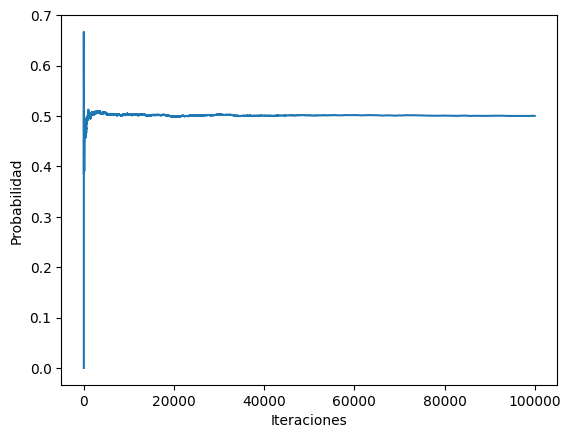

In [71]:
probaility_iter_graph(probability)

Del ejemplo anterior, podemos observar que a medida que aumenta el número de iteraciones, la precisión de la probabilidad también aumenta. De esta manera, podemos utilizar la Simulación de Monte Carlo para encontrar probabilidades de manera experimental.

Ahora, exploraremos otro ejemplo para comprender por qué realizamos tantas iteraciones. Presentaremos la gráfica de la distribución normal de diferentes tamaños de muestras, así como también mostraremos la distribución del lanzamiento de un dado con 100,000 iteraciones para ilustrar cómo la simulación puede proporcionar una visión más precisa de los resultados.

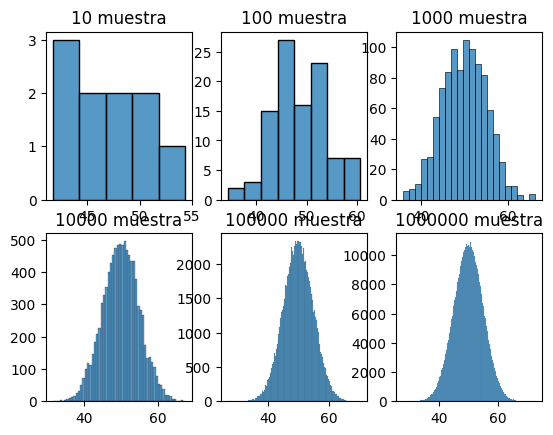

In [62]:
mu = 50
sigma = 5

sizes = [10, 100, 1000, 10000, 100000, 1000000]

for i in range (len(sizes)):
    sample = np.random.normal(mu, sigma, sizes[i])
    plt.subplot(2,3,i+1)
    sns.histplot(sample)
    plt.title('%d muestra'%sizes[i])
    plt.ylabel('')

De los gráficos anteriores, podemos observar que a medida que aumenta el tamaño de la muestra, aumenta la precisión de los resultados. Esto significa que con un mayor número de iteraciones o una muestra más grande, obtenemos una representación más precisa de la distribución de probabilidad o del fenómeno que estamos modelando. En el caso del lanzamiento de un dado, por ejemplo, con 100,000 iteraciones, observamos una distribución más uniforme y equilibrada de los resultados, lo que refleja mejor las probabilidades teóricas.

<h2>Ley de los grandes números</h2>

En pruebas repetidas e independientes con una probabilidad constante  p  de la población de un resultado particular en cada prueba, la probabilidad de que ocurra el resultado, es decir, obtenida a partir de las muestras, tiende a cero a medida que el número de pruebas tiende a infinito.

Esto simplemente significa que si ocurren desviaciones (varianza) del comportamiento esperado (probabilidad  p ), es probable que en el futuro estas desviaciones sean compensadas por desviaciones opuestas.

Después de un evento aleatorio extremo, es probable que el siguiente evento aleatorio sea menos extremo para que se mantenga la media.

Por ejemplo, si se tira la modena 100 veces y siempre sale cara, entonces es un evento extremo con una probabilidad de 0.1%, y es probable que en las próximas 10 vueltas obtengamos menos de 10 caras.

No es posible garantizar una precisión perfecta mediante el muestreo, ni tampoco se puede afirmar que una estimación no sea precisamente correcta. Surge aquí la pregunta de cuántas muestras se necesitan observar antes de tener una confianza significativa en nuestra respuesta. Esto depende de la variabilidad en la distribución subyacente.

La Ley de los Grandes Números es un principio fundamental en estadística que establece que a medida que aumenta el tamaño de una muestra aleatoria, la media de esa muestra tiende a acercarse al valor esperado o teórico de la población de la que se extrajo la muestra. En otras palabras, cuando se realizan repetidas veces experimentos aleatorios con una misma probabilidad de ocurrencia, la frecuencia relativa de un evento tiende a converger hacia la probabilidad real del evento a medida que se aumenta el número de repeticiones.

<h2>Niveles de confianza e intervalos de confianza</h2>

En situaciones de la vida real, no podemos estar seguros de ningún parámetro desconocido obtenido de una muestra para toda la población, por lo que hacemos uso de niveles de confianza e intervalos de confianza. Los niveles de confianza e intervalos de confianza son herramientas estadísticas que nos ayudan a estimar parámetros desconocidos de una población basándonos en muestras.

El nivel de confianza indica la probabilidad de que el intervalo de confianza contenga el verdadero valor del parámetro. Por ejemplo, un nivel de confianza del 95% significa que si repitiéramos el proceso de muestreo muchas veces, el 95% de las veces el intervalo de confianza contendría el verdadero valor del parámetro.

El intervalo de confianza es un rango dentro del cual creemos que el valor del parámetro se encuentra con cierta probabilidad. Por ejemplo, un intervalo de confianza del 95% para la media de una población nos indica que tenemos un 95% de confianza en que la media real de la población se encuentra dentro de ese intervalo.

<h2>Ejemplo con cartas</h2>

La función shuffle_cards es una función utilizada en programas de barajado de cartas en juegos de cartas virtuales o simulaciones. La función genera un conjunto de cartas y las reorganiza de manera aleatoria. El propósito principal de la función es simular el proceso de barajado de un mazo de cartas en la vida real, donde las cartas se mezclan de manera aleatoria para garantizar que el orden de las cartas sea impredecible y justo para todos los jugadores involucrados. La función retornas las cartas en el orden barajado.

In [4]:
def shuffle_cards():
    # a list of all the suits 
    Suits = ["\u2663", "\u2665", 
            "\u2666", "\u2660"] 
    # a list of all the ranks 
    Ranks = ['A', '2', '3', '4', '5', 
            '6', '7', '8', '9', '10', 
            'J', 'Q', 'K'] 
    
    deck = list(product(Ranks, Suits)) 
    shuffle(deck) 
    return deck


En el siguiente código, podemos observar cómo llamamos a la función shuffle_cards para mezclar un mazo de cartas. Después de barajar el mazo, mostramos las primeras 5 cartas de la mano para ver el resultado del barajado.

In [64]:
cards = shuffle_cards()

print("Primera carta: {}".format(cards[0][0] + cards[0][1]))
print("Segunda carta: {}".format(cards[1][0] + cards[1][1]))
print("Tercera carta: {}".format(cards[2][0] + cards[2][1]))
print("Cuarta carta:  {}".format(cards[3][0] + cards[3][1]))
print("Quinta carta:  {}".format(cards[4][0] + cards[4][1]))

Primera carta: Q♥
Segunda carta: J♥
Tercera carta: 6♣
Cuarta carta:  8♣
Quinta carta:  5♦


<h3>Juego de Boss</h3>
Imaginemos que tenemos un juego llamado Boss en el que el jugador saca una carta de un mazo. Si la carta sacada es un as, entonces el jugador gana $10. De lo contrario, el jugador pierde. Es un juego simple pero emocionante donde la suerte juega un papel crucial.

La siguiente función implementa este juego.

In [65]:
def boss(card):
    if card[0]=='A':
        return 1
    return 0

0.077159


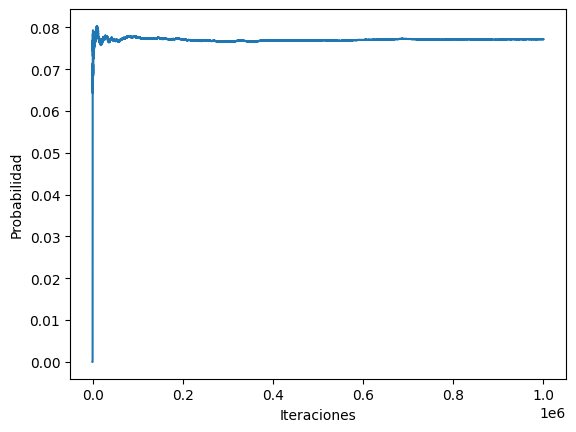

In [73]:
probability = []
iter = 1000000

win=0
for i in range (iter):
    cards = shuffle_cards()
    win = win + boss(cards[0])
    probability.append(win/(i+1))

print(win/iter)
probaility_iter_graph(probability)


En la gráfica que presentamos, podemos observar cómo se establece la probabilidad de ganar el juego Boss determinando la cantidad de veces que ganamos el juego por iteración. Teniendo en cuenta que para ganar solo existen 4 opciones de obtener un as de las 52 cartas del mazo, la probabilidad de ganar está definida por 4/52. Este valor teorico es bien similar al que se establece luego de varias jugadas.

<h3>Juego de Dos Reyes</h3>

El juego de cartas Dos Reyes es un juego simple y emocionante en el que el objetivo es obtener dos reyes en una mano para ganar. El juego se juega con un mazo estándar de 52 cartas. Para ganar el jugador debe sacar dos carta del mazo y estas deben ser reyes ambas.

Para calcular la probabilidad de sacar dos reyes de un mazo de cartas estándar de 52 cartas, primero determinamos cuántas combinaciones de dos reyes hay en el mazo y luego dividimos esto por el número total de posibles combinaciones de dos cartas que pueden sacarse del mazo.

Cuando se extraen dos cartas de un mazo de 52 cartas, hay varias formas en las que estas dos cartas pueden ser seleccionadas de entre las 52 cartas disponibles. Esto se calcula utilizando el concepto de combinaciones.

La fórmula para calcular el número de combinaciones de n elementos tomados de r en r es C(n, r), y se calcula como:
$$ \frac{n!}{r!(n-r)!} $$

En este caso particular, queremos calcular el número de formas en las que se pueden seleccionar dos cartas de un mazo de 52 cartas. Esto se expresa como C(52, 2), que es igual a:
$$\frac{52!}{2!(52-2)!}$$

Simplificando esta expresión, obtenemos:
$$\frac{52 \times 51}{2} = 1326 $$ 

Esto significa que hay 1326 formas diferentes de seleccionar dos cartas de un mazo de 52 cartas.

Queremos calcular el número de formas en que se pueden seleccionar dos reyes de un total de cuatro reyes disponibles en el mazo. Esto se expresa como C(4, 2), que es igual a 
$$\frac{4!}{2!(4-2)!}$$

Simplificando esta expresión, obtenemos:
$$\frac{4 \times 3}{2} = 6 $$

Esto significa que hay 6 formas diferentes en las que se pueden seleccionar dos reyes de un total de cuatro reyes disponibles en el mazo. Por lo tanto, el evento de que dos reyes aparezcan en un solo sorteo puede ocurrir de 6 maneras diferentes.

La probabilidad de que las dos cartas extraídas de una baraja de 52 cartas sean reyes.
$$\frac{6}{1326}=\frac{1}{221}=0.00452488687$$

In [74]:
def twokings(card1, card2):
    if card1[0]=='A' and card2[0]=='A':
        return 1
    return 0

0.004509


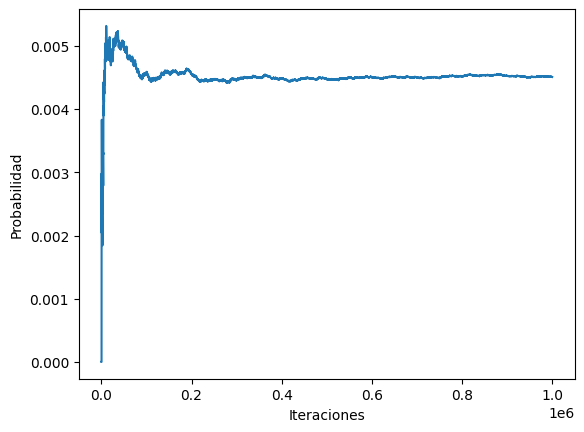

In [75]:
probability = []
iter = 1000000

win=0
for i in range (iter):
    cards = shuffle_cards()
    win = win + twokings(cards[0], cards[1])
    probability.append(win/(i+1))

print(win/iter)
probaility_iter_graph(probability)

El valor teórico obtenido mediante el proceso combinatorio de 0.004525 es muy similar al obtenido mediante una simulación de Monte Carlo, donde después de jugar el juego 1,000,000 veces se obtiene una probabilidad de ganar de 0.004509. Esto muestra que los resultados teóricos y los resultados de la simulación de Monte Carlo están en estrecha concordancia, lo que respalda la precisión y validez del análisis teórico y demuestra la eficacia de la simulación para estimar probabilidades en juegos de cartas como este.

<h3>Ejercicio Practico</h3>

Tenemos dos juegos de cartas diferentes: Biggie y Sweethearts.

En el juego Biggie, el jugador extrae dos cartas del mazo. Si la segunda carta sacada tiene un rango estrictamente superior al de la primera carta sacada, entonces el jugador gana $2. De lo contrario, el jugador pierde.

Por otro lado, en el juego Sweethearts, el jugador extrae tres cartas del mazo. El jugador debe sacar las tres cartas de corazon para ganar.

Los estudiantes pueden trabajar en grupos para resolver estos problemas utilizando conceptos de probabilidad y combinaciones. Una vez que hayan calculado las probabilidades, pueden comparar sus respuestas y discutir sus métodos de resolución en clase.


In [ ]:
####

<h2>Conclusión</h2>
La simulación de Monte Carlo ha demostrado ser una herramienta invaluable para comprender y analizar situaciones complejas que involucran azar, como los juegos de dados y cartas. A través de ejemplos prácticos como lanzar dados y barajar cartas, pudimos aplicar conceptos teóricos de probabilidad y combinatoria para estimar probabilidades y comprender mejor el comportamiento de estos sistemas.

En los ejemplos de dados, pudimos simular miles de lanzamientos para estimar la probabilidad de obtener ciertos resultados, como la suma de los valores de los dados. Observamos cómo, a medida que aumentaba el número de lanzamientos, las frecuencias relativas convergían hacia las probabilidades teóricas esperadas, validando así nuestros cálculos teóricos.

En el caso de los juegos de cartas, como el Dos Reyes, pudimos utilizar la simulación para estimar la probabilidad de obtener ciertas combinaciones de cartas. Al comparar estos resultados con los cálculos teóricos, encontramos una estrecha concordancia entre ambas aproximaciones, lo que nos dio confianza en la precisión de nuestros análisis.